In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf


In [14]:


# Define the URL of the Django endpoint
url = "http://127.0.0.1:8000/dataset_manager/get_stock_data/"

ticker = "AAPL"
featuees = ["open", "high", "low", "close", "volume", "ema50", "ema100", "ema200",
            'pctChgclose', 'pctChgvolume', 'pctDiff+ema50_close', 'pctDiff+ema100_close',
            'pctDiff+ema200_close', 'pctDiff+smaVol10_volume', 'pctDiff+smaVol20_volume',
            'pctDiff+bb_high_close10', 'pctDiff+bb_low_close10', 'rsi10', 'rsi20',
            'opHi', 'opCl', 'pctChgClOp', 'macd_signal']
start_date = "2010-01-01"
end_date = "2020-01-01"
interval = "1d" 

params = {
    "start_date": start_date,
    "end_date": end_date,
    "interval": interval
}

url = url + ticker + "/"

response = requests.get(url, params)




In [15]:
data = response.json()

In [16]:
# convert to df 
df = pd.DataFrame(data).T
df.tail()

,low,ema5,hiCl,hiLo,high,loCl,macd,opCl,opHi,opLo,...,pctDiff+smaVol10_smaVol200,pctDiff+smaVol200_smaVol10,pctDiff+smaVol200_smaVol20,pctDiff+smaVol200_smaVol50,pctDiff+smaVol20_smaVol100,pctDiff+smaVol20_smaVol200,pctDiff+smaVol50_smaVol100,pctDiff+smaVol50_smaVol200,pctDiff+smaVol100_smaVol200,pctDiff+smaVol200_smaVol100
2019-12-24 00:00:00+00:00,70.730003,70.429501,-0.217637,0.696310,71.222504,0.477158,1.656653,-0.147534,0.070256,-0.621725,...,13.104997,-11.586577,2.470183,10.570480,-0.360293,-2.410636,-7.659812,-9.559948,-2.057756,2.100989
2019-12-26 00:00:00+00:00,71.175003,71.112168,-0.024142,1.854583,72.495003,1.829993,1.781618,1.787092,1.811672,-0.042130,...,14.589945,-12.732309,2.910298,10.283503,0.167732,-2.827995,-6.529164,-9.324607,-2.990711,3.082912
2019-12-27 00:00:00+00:00,72.029999,71.558111,-1.418517,2.030406,73.492500,0.583088,1.857027,-0.453424,0.978980,-1.030503,...,15.139496,-13.148829,-0.659393,8.945402,3.986159,0.663770,-5.181422,-8.210904,-3.195030,3.300481
2019-12-30 00:00:00+00:00,71.305000,71.998740,-0.399745,2.619031,73.172501,2.208817,1.929248,0.711669,1.115875,-1.464793,...,16.171380,-13.920279,-4.945237,7.241459,8.504703,5.202513,-3.825545,-6.752481,-3.043361,3.138889
2019-12-31 00:00:00+00:00,72.379997,72.469993,-0.010215,1.436862,73.419998,1.426501,2.006325,1.283069,1.293416,-0.141415,...,13.674752,-12.029718,-5.224768,7.150107,8.879033,5.512799,-3.695518,-6.672982,-3.091719,3.190356


In [17]:
df_features = df[featuees]

<Axes: >

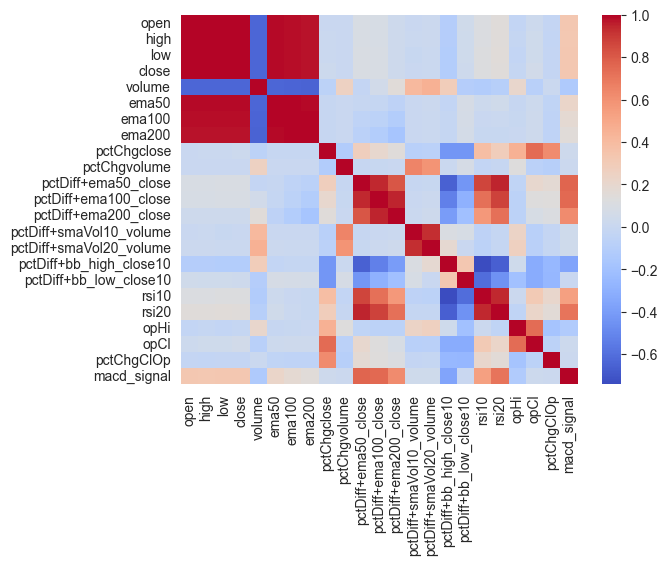

In [18]:
corr = df_features.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")

array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>,
        <Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'close'}>,
        <Axes: title={'center': 'volume'}>],
       [<Axes: title={'center': 'ema50'}>,
        <Axes: title={'center': 'ema100'}>,
        <Axes: title={'center': 'ema200'}>,
        <Axes: title={'center': 'pctChgclose'}>,
        <Axes: title={'center': 'pctChgvolume'}>],
       [<Axes: title={'center': 'pctDiff+ema50_close'}>,
        <Axes: title={'center': 'pctDiff+ema100_close'}>,
        <Axes: title={'center': 'pctDiff+ema200_close'}>,
        <Axes: title={'center': 'pctDiff+smaVol10_volume'}>,
        <Axes: title={'center': 'pctDiff+smaVol20_volume'}>],
       [<Axes: title={'center': 'pctDiff+bb_high_close10'}>,
        <Axes: title={'center': 'pctDiff+bb_low_close10'}>,
        <Axes: title={'center': 'rsi10'}>,
        <Axes: title={'center': 'rsi20'}>,
        <Axes: title={'center': 'opHi'}>],
       [<A

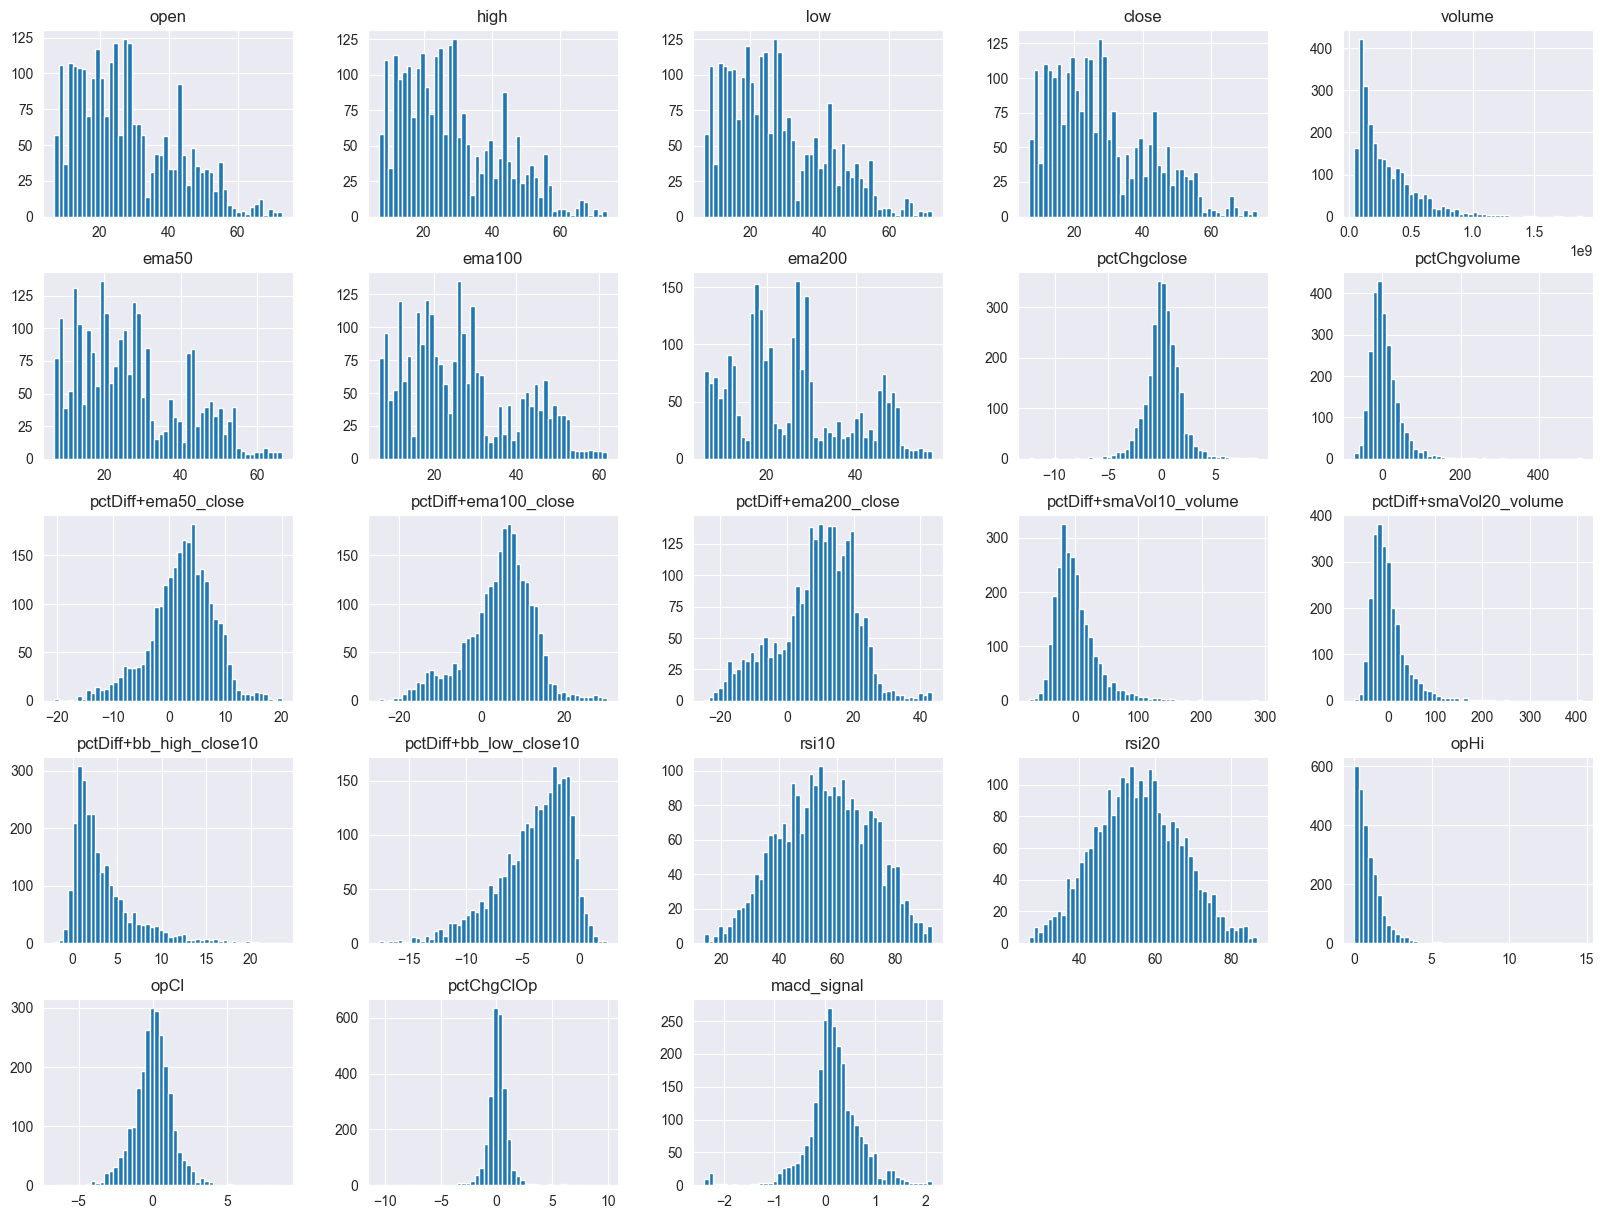

In [19]:
df_features.hist(bins=50, figsize=(20,15))

/Users/andrewpassero/miniforge3/envs/TradeLens/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


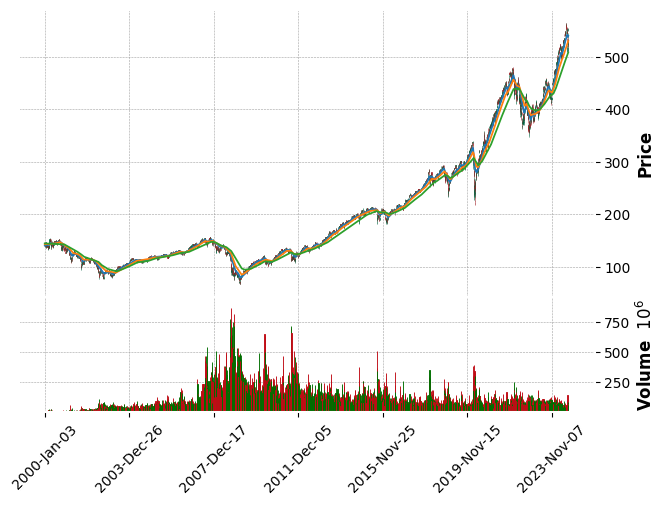

In [43]:
# plot candlestick of open, high, low, close, volume, ema50, ema100, ema200
df_candle = df[['open', 'high', 'low', 'close', 'volume', 'ema50', 'ema100', 'ema200']]
df_candle.index = pd.to_datetime(df_candle.index)
ema_plots = [mpf.make_addplot(df['ema50']), mpf.make_addplot(df['ema100']), mpf.make_addplot(df['ema200'])]
mpf.plot(df_candle, type='candle', style='charles', volume=True, addplot=ema_plots)